In [65]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-06-29 09:22:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.112, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   156MB/s    in 3.3s    

2022-06-29 09:22:17 (151 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [4]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [66]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [67]:
class_names = ['chicken_curry', 'chicken_wings' ,'fried_rice', 'grilled_salmon' ,'hamburger',
 'ice_cream' ,'pizza' ,'ramen' ,'steak' ,'sushi']

In [68]:
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(32,3,activation='relu',padding='same',input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(10,activation='softmax')
])

In [44]:

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 28, 28, 64)      

In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data,
          epochs=5,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps= (0.5 * len(test_data)))

Epoch 1/5
235/235 [==============================] - 40s 168ms/step - loss: 2.2351 - accuracy: 0.1559 - val_loss: 2.1401 - val_accuracy: 0.1953
Epoch 2/5
235/235 [==============================] - 39s 167ms/step - loss: 2.0758 - accuracy: 0.2421 - val_loss: 1.9700 - val_accuracy: 0.2773
Epoch 3/5
235/235 [==============================] - 39s 166ms/step - loss: 1.9408 - accuracy: 0.3132 - val_loss: 1.8660 - val_accuracy: 0.3648
Epoch 4/5
235/235 [==============================] - 40s 169ms/step - loss: 1.8145 - accuracy: 0.3651 - val_loss: 1.7781 - val_accuracy: 0.3773
Epoch 5/5
235/235 [==============================] - 39s 167ms/step - loss: 1.7242 - accuracy: 0.4048 - val_loss: 1.7684 - val_accuracy: 0.3898


In [70]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [78]:
model_2 = Sequential([
                    Conv2D(32,3,activation='relu',padding='same',input_shape=(224,224,3)),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Conv2D(64,3,activation='relu',padding='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(64,activation='relu'),
                    Dense(10,activation='softmax')
])


model_2.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_147 (Conv2D)         (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 112, 112, 32)     0         
 ng2D)                                                           
                                                                 
 conv2d_148 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_148 (MaxPooli  (None, 56, 56, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_149 (Conv2D)         (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 28, 28, 64)     

In [80]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_2 = model_2.fit(train_data_augmented,
          epochs=45,
          steps_per_epoch=len(train_data),
          validation_data=test_data,
          validation_steps= (0.5 * len(test_data)))

Epoch 1/45
235/235 [==============================] - 180s 766ms/step - loss: 2.2044 - accuracy: 0.1700 - val_loss: 2.1141 - val_accuracy: 0.2148
Epoch 2/45
235/235 [==============================] - 105s 449ms/step - loss: 2.1192 - accuracy: 0.2261 - val_loss: 1.9916 - val_accuracy: 0.2672
Epoch 3/45
235/235 [==============================] - 106s 449ms/step - loss: 2.0513 - accuracy: 0.2644 - val_loss: 1.8408 - val_accuracy: 0.3562
Epoch 4/45
235/235 [==============================] - 106s 452ms/step - loss: 1.9758 - accuracy: 0.2969 - val_loss: 1.8381 - val_accuracy: 0.3438
Epoch 5/45
235/235 [==============================] - 106s 450ms/step - loss: 1.9221 - accuracy: 0.3285 - val_loss: 1.7493 - val_accuracy: 0.4023
Epoch 6/45
235/235 [==============================] - 106s 449ms/step - loss: 1.8520 - accuracy: 0.3472 - val_loss: 1.6657 - val_accuracy: 0.4102
Epoch 7/45
235/235 [==============================] - 106s 452ms/step - loss: 1.7817 - accuracy: 0.3832 - val_loss: 1.7194 -

In [81]:
model_2.evaluate(train_data)

235/235 [==============================] - 32s 136ms/step - loss: 0.8009 - accuracy: 0.7372


[0.8009478449821472, 0.7372000217437744]

In [84]:
def load_and_prep_image(filename, img_shape=224):
 
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [85]:
import tensorflow as tf
import matplotlib.pyplot as plt

def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1: 
    pred_class = class_names[pred.argmax()] 
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [86]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

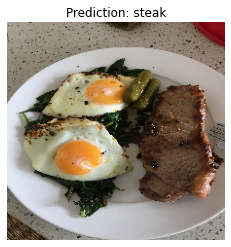

In [88]:
pred_and_plot(model_2, "03-steak.jpeg", class_names)

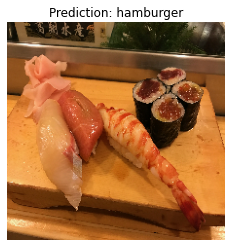

In [89]:
pred_and_plot(model_2, "03-sushi.jpeg", class_names)

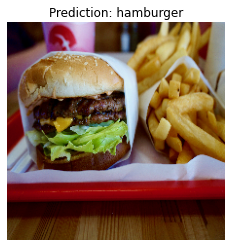

In [91]:
pred_and_plot(model_2, "03-hamburger.jpeg", class_names)

In [92]:
!wget https://recipesofhome.com/wp-content/uploads/2020/03/chicken-curry-recipe-1024x683.jpg

--2022-06-29 11:37:24--  https://recipesofhome.com/wp-content/uploads/2020/03/chicken-curry-recipe-1024x683.jpg
Resolving recipesofhome.com (recipesofhome.com)... 172.67.204.172, 104.21.61.9, 2606:4700:3032::ac43:ccac, ...
Connecting to recipesofhome.com (recipesofhome.com)|172.67.204.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘chicken-curry-recipe-1024x683.jpg’

chicken-curry-recip     [ <=>                ] 120.23K  --.-KB/s    in 0.002s  

2022-06-29 11:37:24 (47.0 MB/s) - ‘chicken-curry-recipe-1024x683.jpg’ saved [123118]



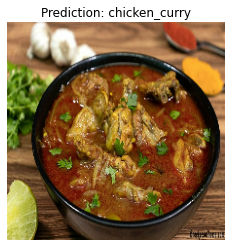

In [93]:
pred_and_plot(model_2, '/content/chicken-curry-recipe-1024x683.jpg', class_names)

In [94]:
!wget -q https://www.licious.in/blog/wp-content/uploads/2020/12/Fried-Chicken-Wing.jpg
!wget -q https://cjeatsrecipes.com/wp-content/uploads/2022/04/Egg-Fried-Rice-FINAL-1050x1536.jpg
!wget -q https://hips.hearstapps.com/delish/assets/18/11/1520957481-grilled-salmon-horizontal.jpg
!wget -q https://www.sweetestmenu.com/wp-content/uploads/2018/08/oreoicecream8.jpg
!wget -q https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fimages.media-allrecipes.com%2Fuserphotos%2F9020363.jpg&q=60
!wget -q https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQrJ2PJxdlFV6QvpHAem1ZMbT3r3Io9ceZ_mg&usqp=CAU

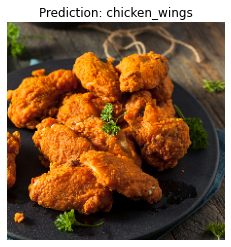

In [95]:
pred_and_plot(model_2, '/content/Fried-Chicken-Wing.jpg', class_names)

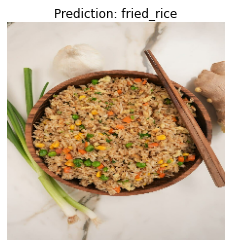

In [96]:
pred_and_plot(model_2, '/content/Egg-Fried-Rice-FINAL-1050x1536.jpg', class_names)

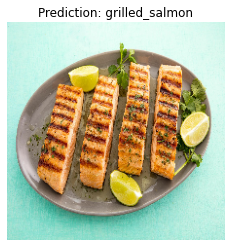

In [97]:
pred_and_plot(model_2, '/content/1520957481-grilled-salmon-horizontal.jpg', class_names)

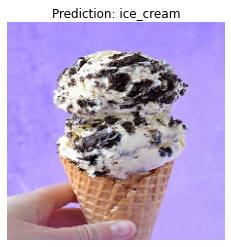

In [98]:
pred_and_plot(model_2, '/content/oreoicecream8.jpg', class_names)

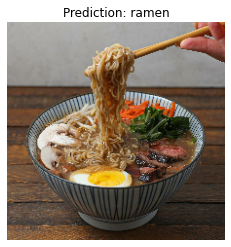

In [99]:
pred_and_plot(model_2, '/content/image?url=https:%2F%2Fimages.media-allrecipes.com%2Fuserphotos%2F9020363.jpg', class_names)

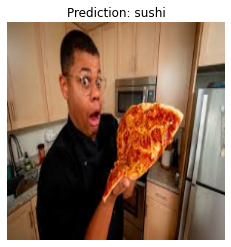

In [100]:
pred_and_plot(model_2, '/content/images?q=tbn:ANd9GcQrJ2PJxdlFV6QvpHAem1ZMbT3r3Io9ceZ_mg', class_names)